%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


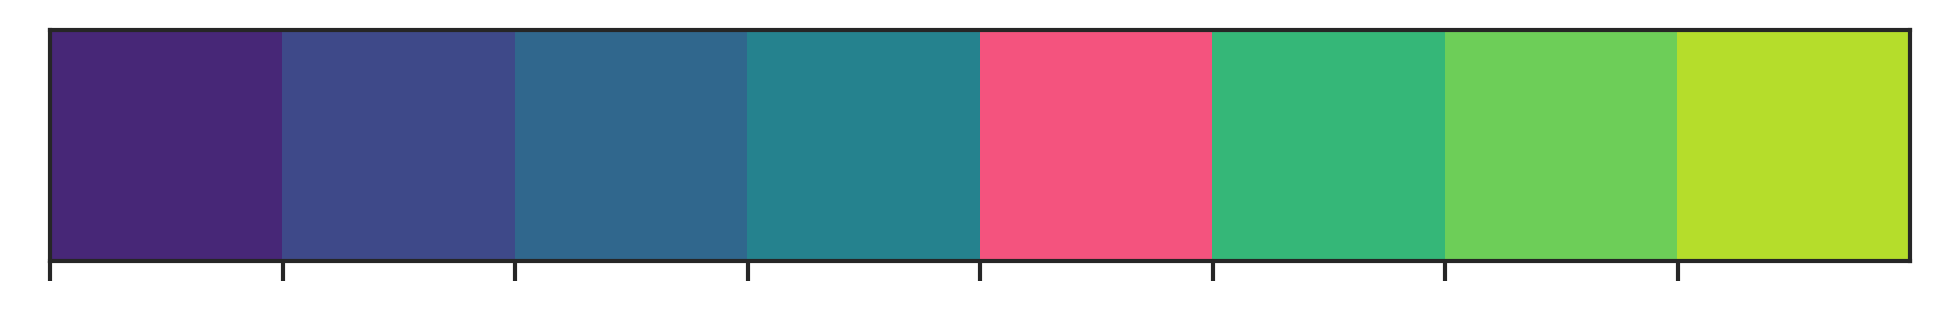

In [1]:
%pylab inline

import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

sns.set_context('paper')
sns.set_style('ticks')

# epsilon scan color palette
cmap = sns.color_palette('viridis',8)
cmap[4] = '#F4537E'
sns.palplot(cmap)

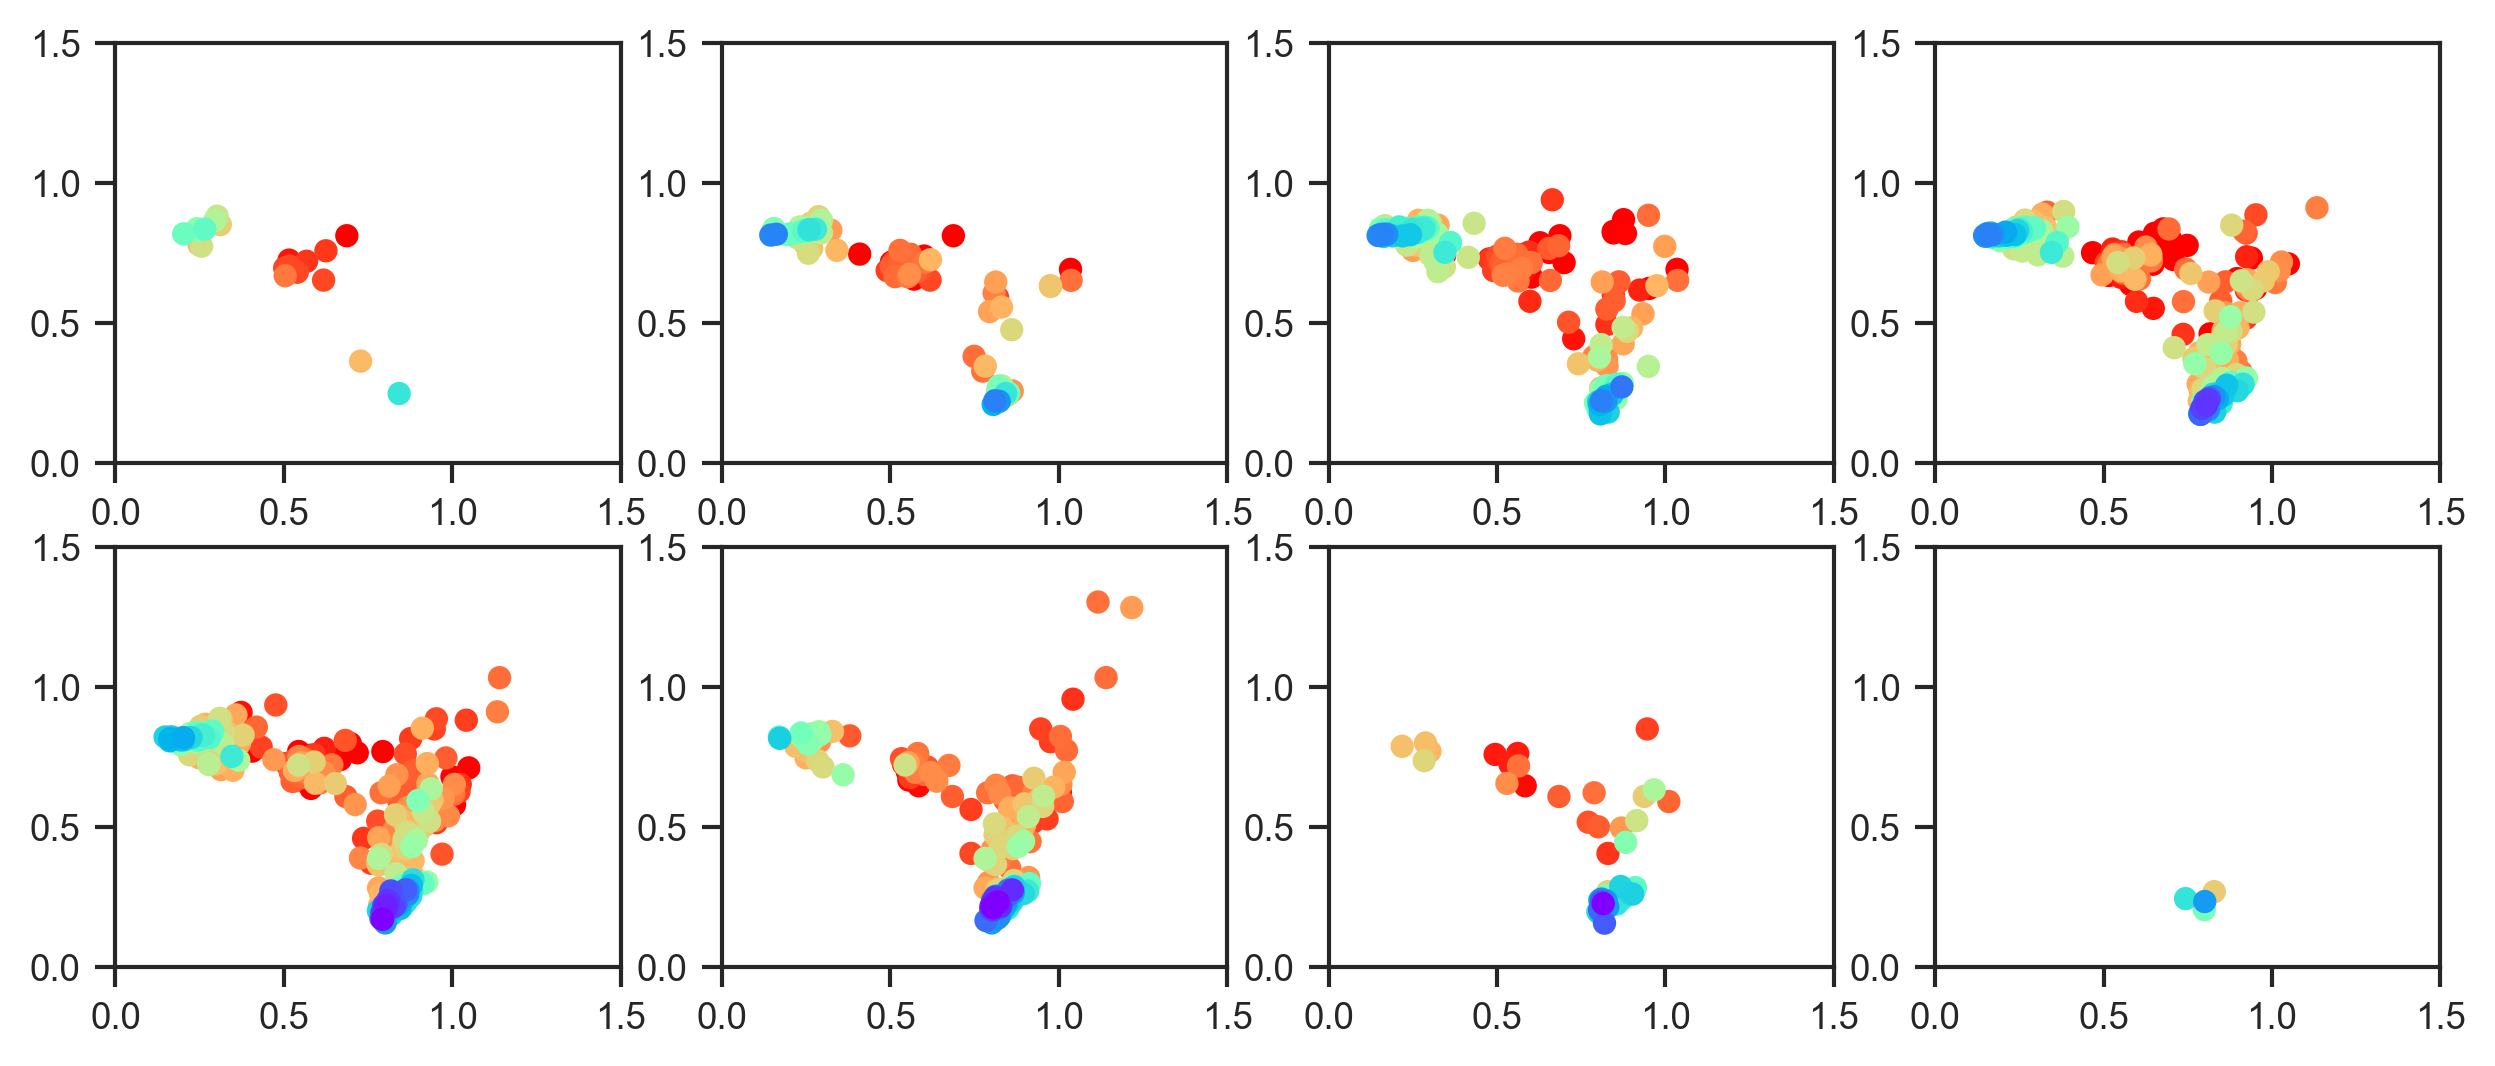

In [13]:
def assign_state(row):
    if row['rmsd_ref_2QKEE'] < 0.3:
        return 'Ground'
    elif row['rmsd_ref_5JYTA'] < 0.3:
        return 'FS'
    else:
        return 'Other'
    
df = pd.read_json('kaib_scan_feats.json.zip')
df['pdb'] = [x.replace('preds_3r/','') for x in df['pdb']]
df['epsilon'] = [int(x.split('_')[0][3:]) for x in df['pdb']]
df['state'] = df.apply(lambda row: assign_state(row), axis=1)

figure(figsize=(10,4))

for i, eps in enumerate(range(3,11)):
    subplot(2,4,i+1)
    tmp = df.loc[df.epsilon==eps]
    tmp = tmp.sort_values('mean_pLDDT')
    scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'],
            c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)
    xlim([0,1.5])
    ylim([0,1.5])

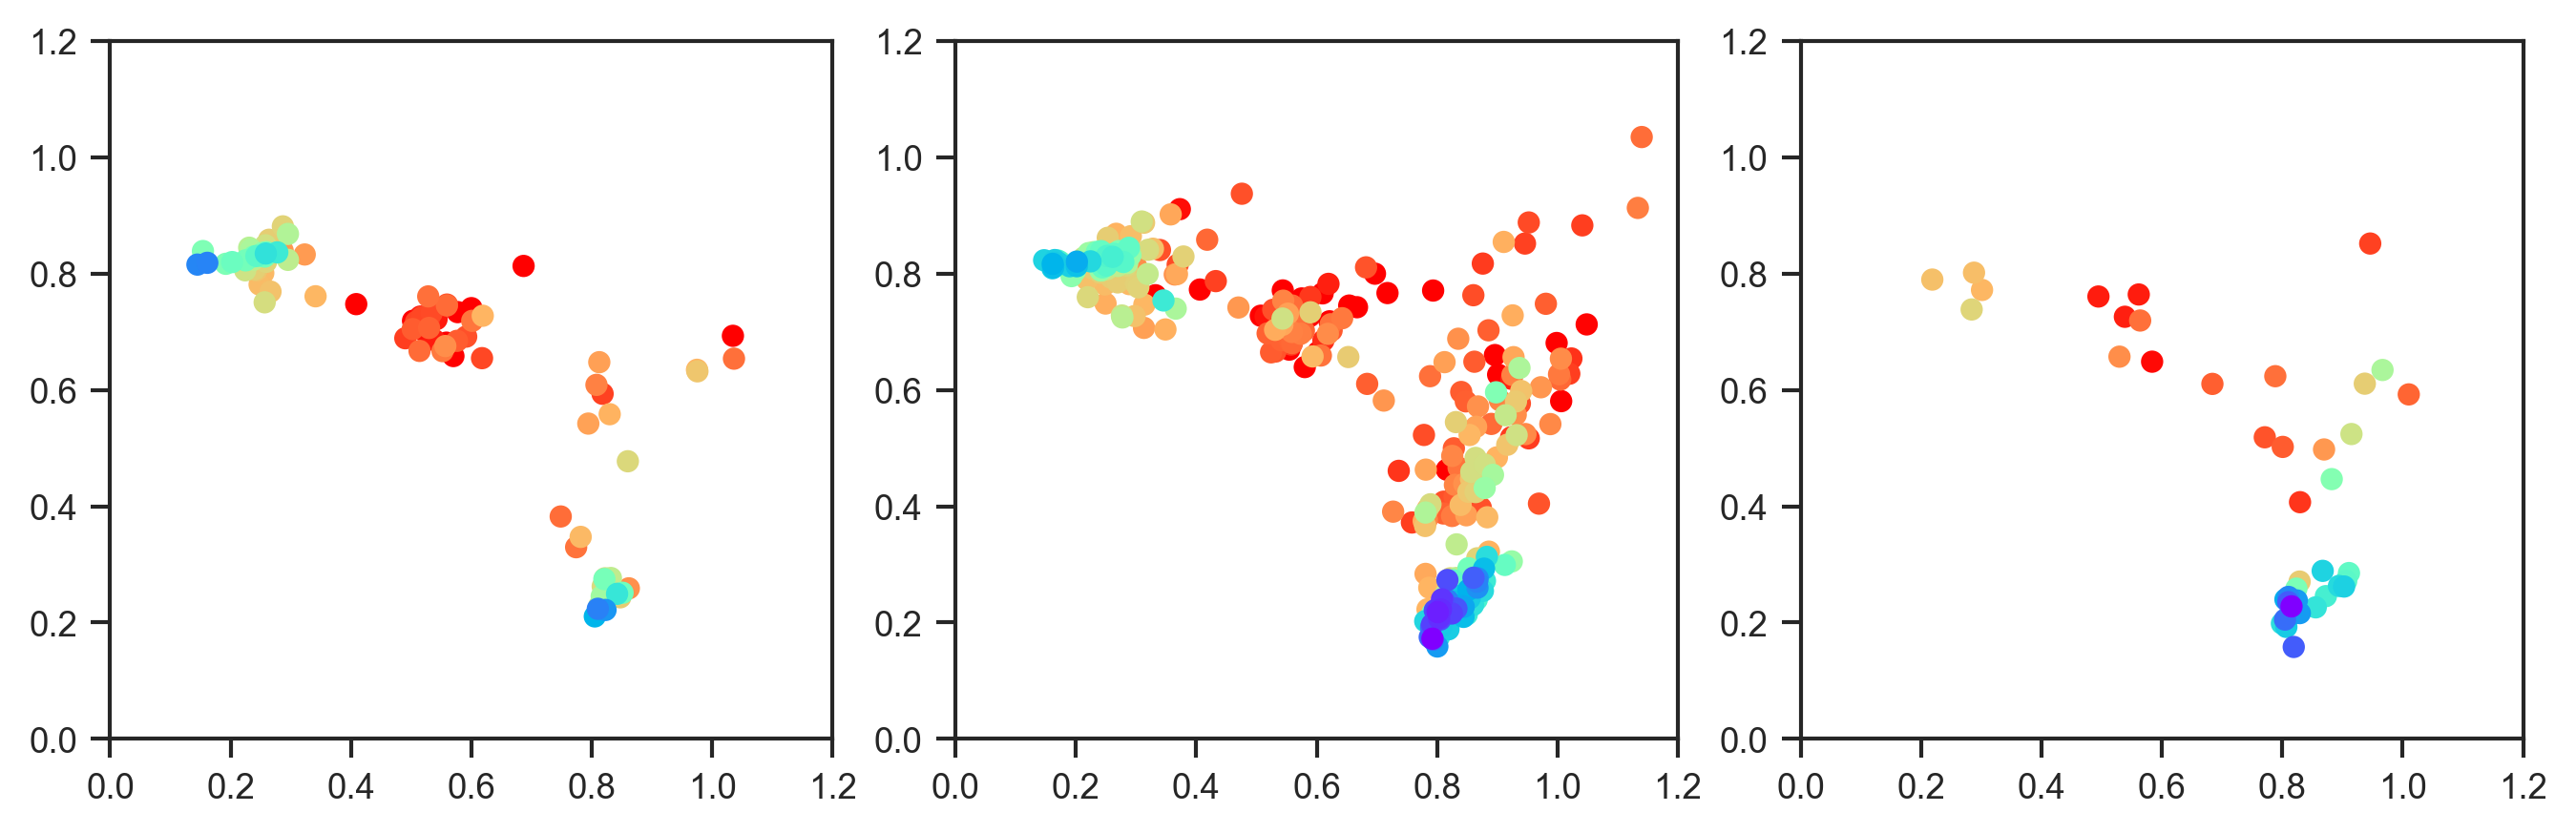

In [7]:
figure(figsize=(9,3))

for i, eps in enumerate([4,7,9]):
    subplot(1,3,i+1)
    tmp = df.loc[df.epsilon==eps]
    tmp = tmp.sort_values('mean_pLDDT')
    scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'],
            c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)
    xlim([0,1.2])
    ylim([0,1.2])
    
tight_layout()
savefig('example_landscapes.pdf', bbox_inches='tight')

In [17]:
n=10

def assign_state(row):
    if row['rmsd_ref_2QKEE'] < 0.3:
        return 'Ground'
    elif row['rmsd_ref_5JYTA'] < 0.3:
        return 'FS'
    else:
        return 'Other'

df_feats = pd.read_json('kaib_scan_feats.json.zip')
df_feats['pdb'] = [x.replace('preds_3r/','') for x in df_feats['pdb']]
df_feats['epsilon'] = [int(x.split('_')[0][3:]) for x in df_feats['pdb']]
df_feats['state'] = df_feats.apply(lambda row: assign_state(row), axis=1)

top_models=pd.DataFrame()
for eps in range(3,11):
    for state in ['FS','Ground']:
        tmp = df_feats.loc[df_feats.epsilon==eps][df_feats.state==state]
        tmp = tmp.sort_values('mean_pLDDT', ascending=False)[:n]
        top_models = top_models.append(tmp, ignore_index=True)

/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_71085/163263959.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df_feats.loc[df_feats.epsilon==eps][df_feats.state==state]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_71085/163263959.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_models = top_models.append(tmp, ignore_index=True)


/Users/wayment/opt/miniconda3/lib/python3.8/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
/Users/wayment/opt/miniconda3/lib/python3.8/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
/Users/wayment/opt/miniconda3/lib/python3.8/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (

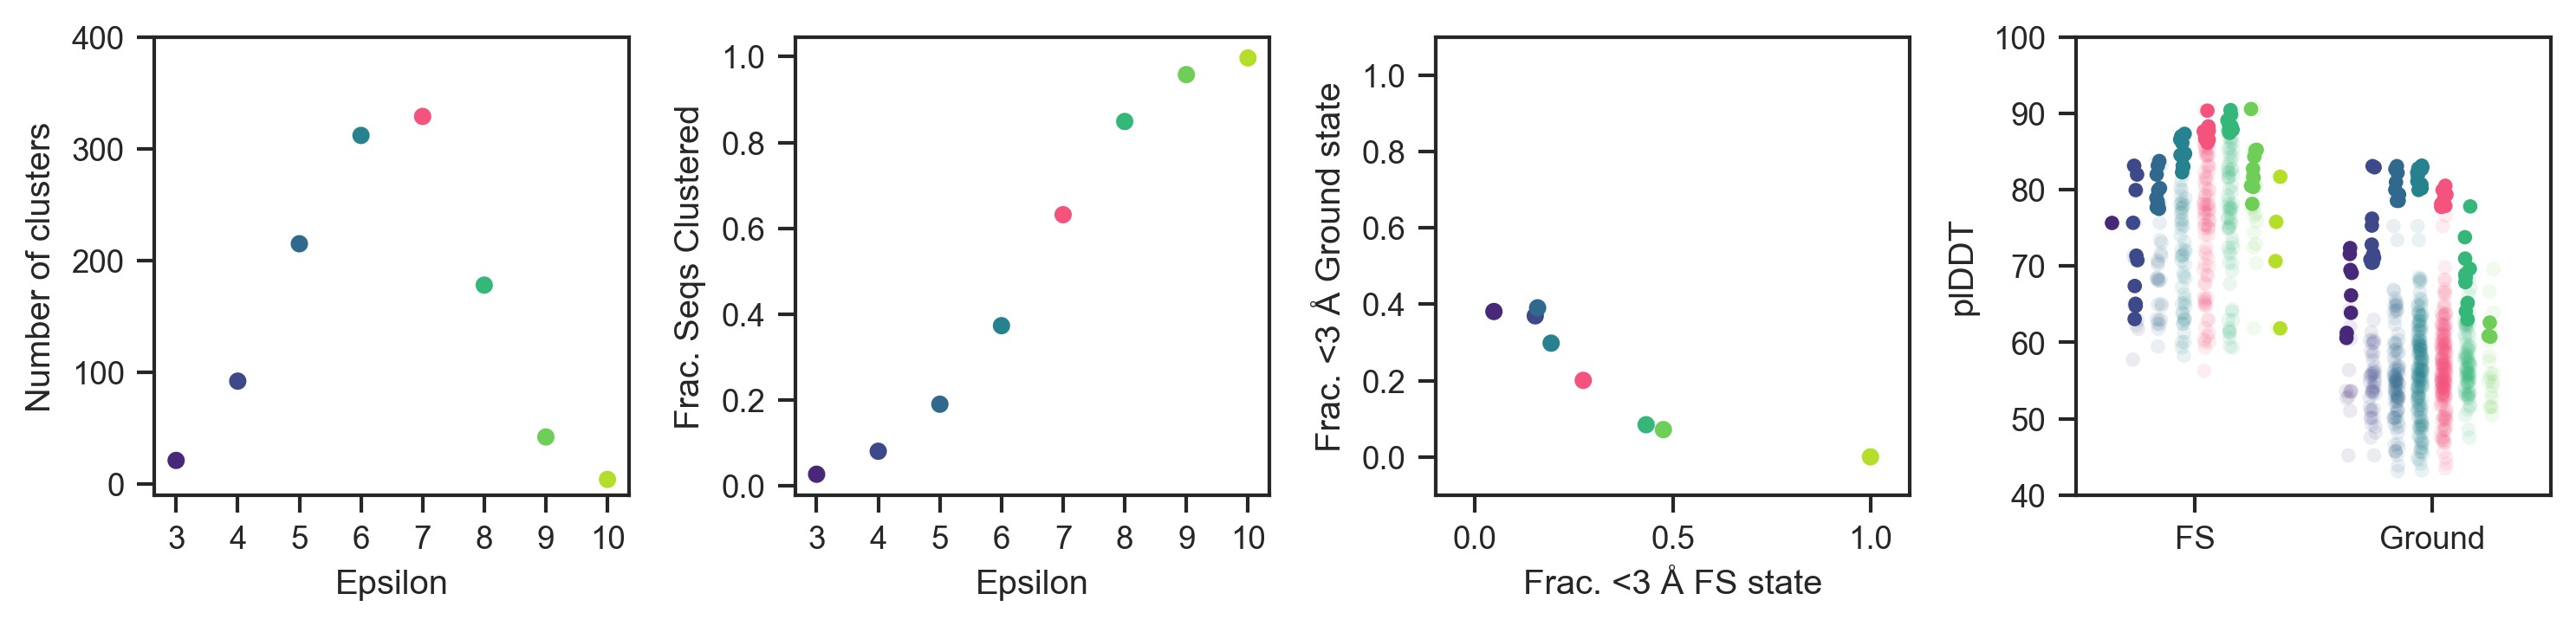

In [18]:
metadata = pd.read_csv('dbscan_metadata.csv')

figure(figsize=(10,2.5))

subplot(1,4,1)
sns.scatterplot(x='Epsilon', y='number of clusters',data=metadata, hue='Epsilon', palette=cmap, linewidth=0)
ylim([-10,400])
legend([], frameon=False)
xticks(range(3,11))
ylabel('Number of clusters')

subplot(1,4,2)
sns.scatterplot(x='Epsilon', y='Fraction Clustered',data=metadata, hue='Epsilon', palette=cmap, linewidth=0)
ylabel('Frac. Seqs Clustered')
legend([], frameon=False)

xticks(range(3,11))

subplot(1,4,3)
# sns.scatterplot(x='Epsilon', y='Avg_lev_dist',data=metadata)
# ylabel('Intracluster similarity')
# ylim([0.5,1])
# xticks(range(3,11))

sns.scatterplot(x='frac fs', y='frac gs',data=metadata, hue='Epsilon', palette=cmap, linewidth=0)
legend([], frameon=False)
xlabel('Frac. <3 Å FS state')
ylabel('Frac. <3 Å Ground state')

xlim([-0.1,1.1])
ylim([-0.1,1.1])


subplot(1,4,4)
sns.stripplot(data=df_feats, x='state', y='mean_pLDDT', hue='epsilon',dodge=True,palette=cmap, alpha=0.1,s=4)

sns.stripplot(data=top_models, x='state', y='mean_pLDDT', hue='epsilon',dodge=True,palette=cmap,s=4)
legend([], frameon=False)
ylim([40,100])
ylabel('plDDT')
xlabel('')
tight_layout()
savefig('dbscan_scan_eps.pdf',bbox_inches='tight')

/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_71085/429389853.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df.loc[df['dbscan_label_%d' % eps] >= j*20][df['dbscan_label_%d' % eps] <= j*20+19]


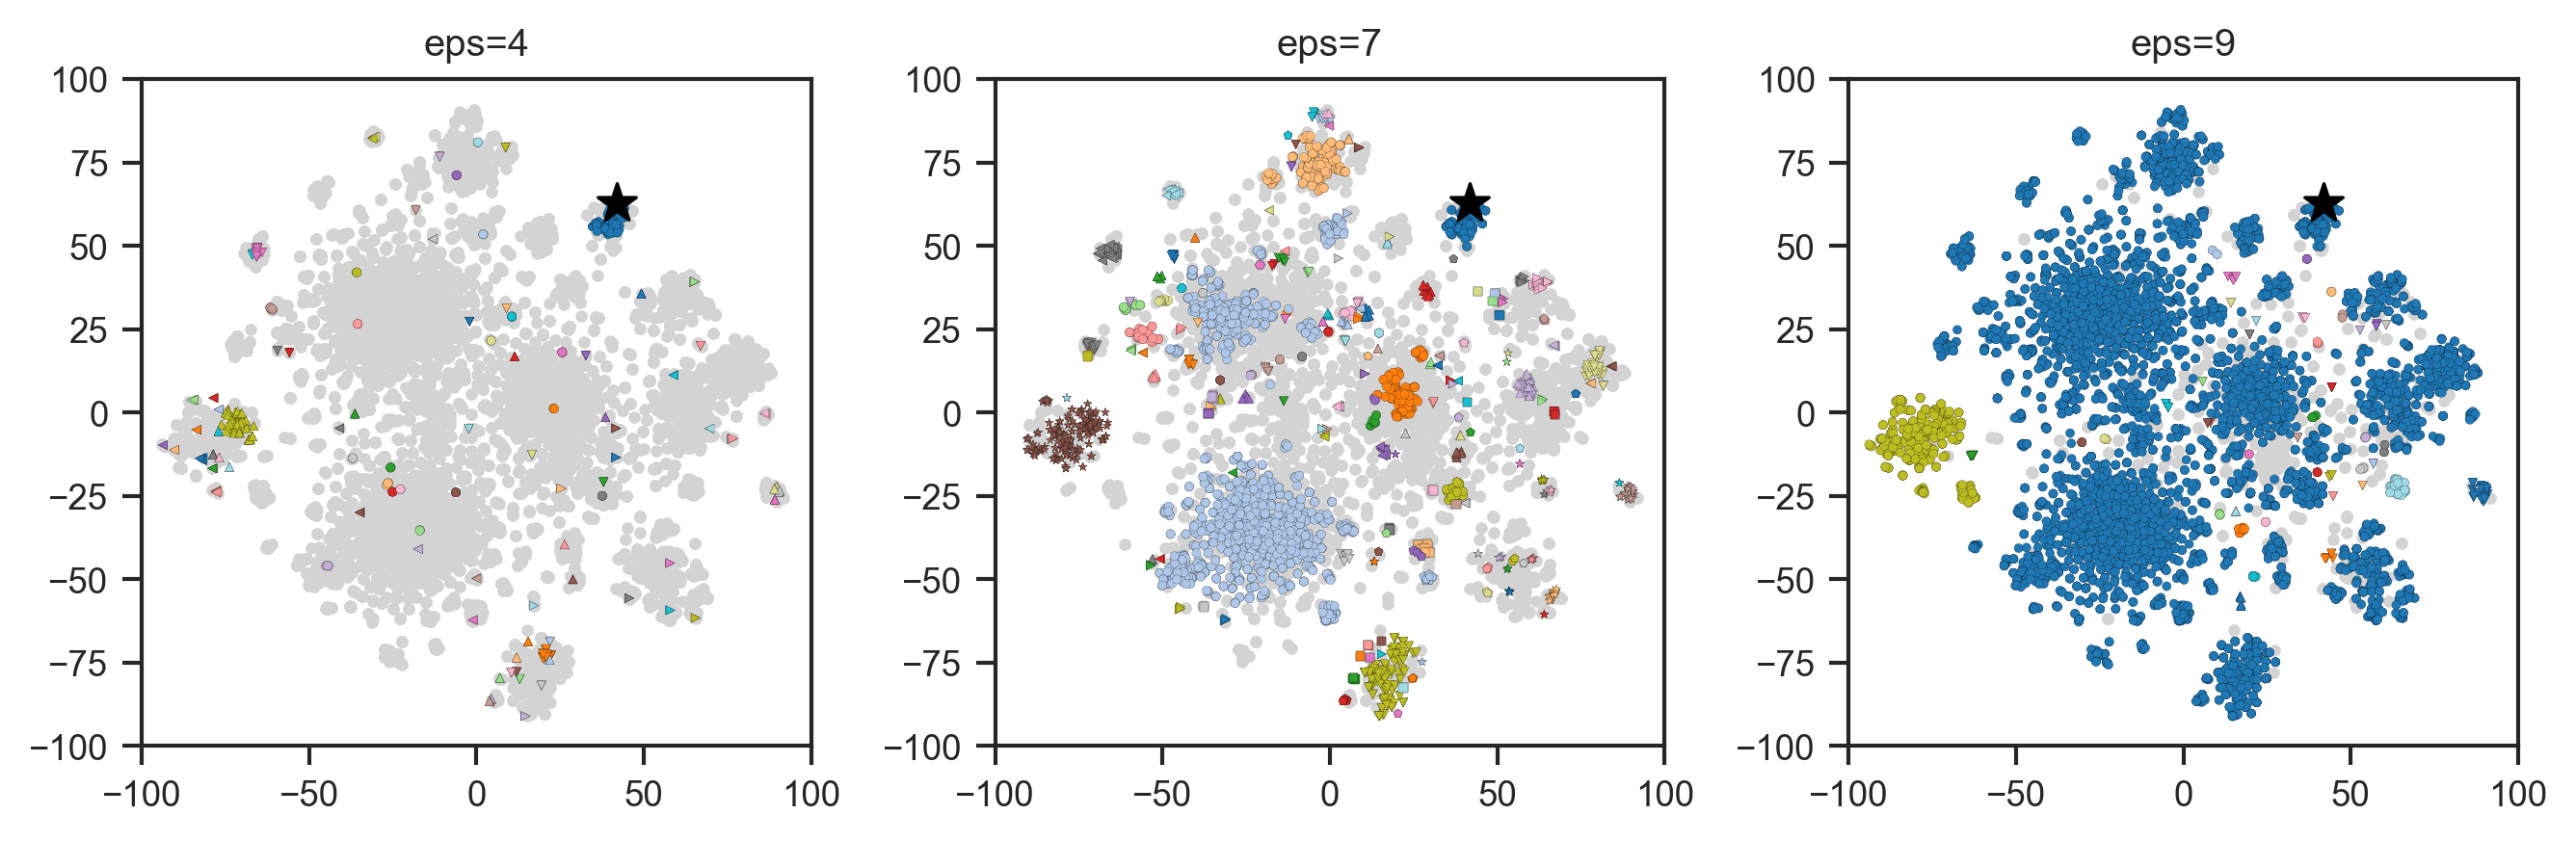

In [11]:
df=pd.read_csv('clustering_outputs/eps3_clustering_assignments.tsv',delimiter='\t')
df['dbscan_label_3'] = df['dbscan_label']
for eps in range(4,11):
    tmp = pd.read_csv('clustering_outputs/eps%d_clustering_assignments.tsv' % eps,delimiter='\t')
    df['dbscan_label_%d' % eps] = tmp['dbscan_label']

query = df.loc[df.SequenceName=='101']

figure(figsize=(9,3))
for i, eps in enumerate([4,7,9]):
    subplot(1,3,i+1)
    tmp = df.loc[df['dbscan_label_%d' % eps] == -1]
    scatter(tmp['TSNE 1'], tmp['TSNE 2'], c='lightgray',s=5)
    
    for j, marker in enumerate('ov^<>sp*'):
        tmp = df.loc[df['dbscan_label_%d' % eps] >= j*20][df['dbscan_label_%d' % eps] <= j*20+19]
        if len(tmp)>0:
            #print(eps, j*20, j*20+19, marker)
            scatter(tmp['TSNE 1'], tmp['TSNE 2'], c=tmp['dbscan_label_%d' % eps],
                    cmap='tab20',s=5, edgecolor='k', linewidth=0.05, marker=marker)
    scatter(query['TSNE 1'], query['TSNE 2'], c='k',s=100, marker='*')
    title('eps=%d'% eps)
    xlim([-100,100])
    ylim([-100,100])
tight_layout()
savefig('example_tsne_plots.pdf', bbox_inches='tight')